* 공공데이터분석 기말고사 2023.06.23 (금)

In [78]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# ipynb 시험파일, html 시험파일, 데이터를 다운 받고,
# ipynb 시험 파일은 파일명 수정 -> da금_기말_20181234_홍길동.ipynb.

# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.
# 문제에 주어진 코드는 수정 불가.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (문제의 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 갑자기 컴퓨터에 문제가 생길수 있으니, 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 중간고사> 에 업로드.


In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy 1.20.1
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1


# 문제1
* 행 중에 nan의 개수가 2개 이상 있는 행을 모두 제거한 dataframe을 출력하시오


In [93]:
d1=pd.read_csv("data/dat1.csv", sep=',', encoding='cp949').reset_index(drop=True)
d1.head()
## 코드작성
sr1 = np.sum(d1.isnull(), axis=1)
d1[sr1<2]

,C1,C2,C3,C4,C5,C6
0,B,3.0,3.0,DD산,NaN,1.045587
1,E,1.0,NaN,a,a,-0.195618
2,E,NaN,NaN,DD,a,0.052008
3,D,2.0,1.0,바다2,NaN,-0.036650
4,E,2.0,1.0,A산,a,0.743268


,C1,C2,C3,C4,C5,C6
0,B,3.0,3.0,DD산,NaN,1.045587
1,E,1.0,NaN,a,a,-0.195618
3,D,2.0,1.0,바다2,NaN,-0.036650
4,E,2.0,1.0,A산,a,0.743268
5,F,3.0,1.0,A산,b,-0.557626
...,...,...,...,...,...,...
493,E,2.0,3.0,바다1G,c,-0.791796
494,C,NaN,1.0,산2,c,0.536938
496,C,NaN,1.0,DD산,a,0.213322
498,D,1.0,3.0,바다B,b,1.786170


# 문제2
* C1 별, C5 별 C2의 값들의 최대값을 barplot으로 아래와 같이 나타내시오 (seaborn 사용)
* 단 x tick이 ABCDEF 순으로 나타나게 그리시오

,C1,C2,C3,C4,C5,C6
0,B,3.0,3.0,DD산,NaN,1.045587
1,E,1.0,NaN,a,a,-0.195618
2,E,NaN,NaN,DD,a,0.052008
3,D,2.0,1.0,바다2,NaN,-0.036650
4,E,2.0,1.0,A산,a,0.743268


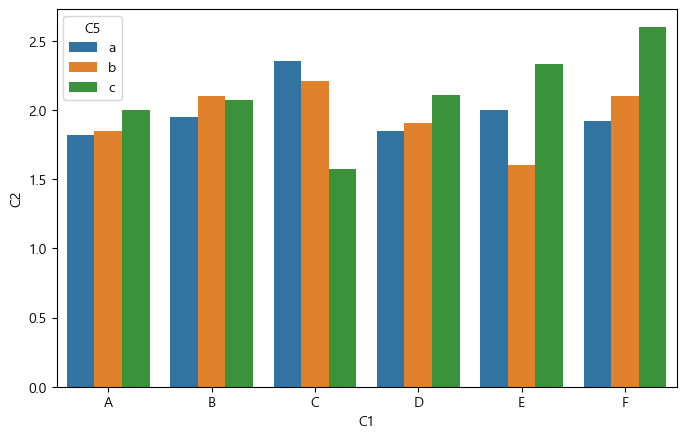

In [110]:
fig=plt.figure(figsize=(8,5), dpi=100)
ax=fig.subplots()

d1=pd.read_csv("data/dat1.csv", sep=',', encoding='cp949').reset_index(drop=True)
d1.head()

## 코드작성
df2 = d1.groupby(['C1','C5'])['C2'].mean().unstack()
_=sns.barplot(data=d1,
              x='C1', y='C2', hue='C5',
              order = df2.index, ci=None,
              ax=ax)

# 문제3
* apply 함수 f1을 적용하여, C1의 값과 C4의 값이 같은 행만 추출한 dataframe을 출력하였다.
* f1을 알맞게 정의하여 아래 결과를 도출하시오

In [42]:
d1=pd.read_csv("data/dat1.csv", sep=',', encoding='cp949').reset_index(drop=True)
d1.head()


def f1(row):
    ## 코드작성
    if row['C4'] == row['C5']:
        return 'P'
    else:
        return 'F'

s1=d1.apply(f1, axis=1)
d1.loc[s1=='P']

,C1,C2,C3,C4,C5,C6
0,B,3.0,3.0,DD산,NaN,1.045587
1,E,1.0,NaN,a,a,-0.195618
2,E,NaN,NaN,DD,a,0.052008
3,D,2.0,1.0,바다2,NaN,-0.036650
4,E,2.0,1.0,A산,a,0.743268


,C1,C2,C3,C4,C5,C6
1,E,1.0,NaN,a,a,-0.195618
24,E,NaN,NaN,c,c,-0.287603
39,F,3.0,1.0,a,a,0.726279
97,B,3.0,1.0,c,c,0.303752
107,A,NaN,NaN,b,b,0.780537


# 문제4
* C4 column에 '산'이 포함되어있는 행의 C1 column값의 분포와,
* C4 column에 '바다'가 포함되어있는 행의 C1 column값의 분포를
* 아래와 같이 seaborn으로 나타내시오

,C1,C2,C3,C4,C5,C6
0,B,3.0,3.0,DD산,NaN,1.045587
1,E,1.0,NaN,a,a,-0.195618
2,E,NaN,NaN,DD,a,0.052008
3,D,2.0,1.0,바다2,NaN,-0.036650
4,E,2.0,1.0,A산,a,0.743268


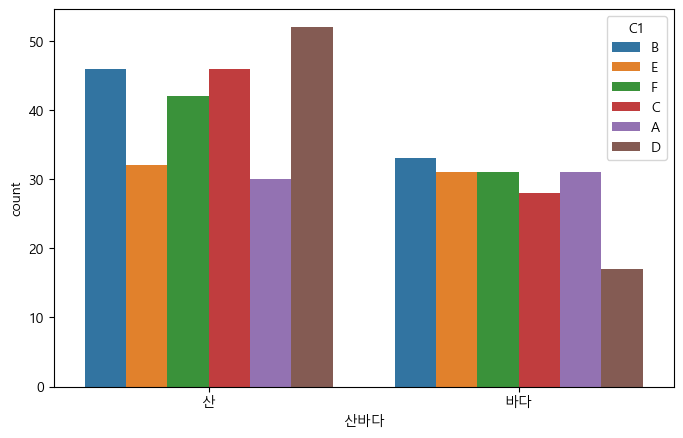

In [111]:
fig=plt.figure(figsize=(8,5), dpi=100)
ax=fig.subplots()

d1=pd.read_csv("data/dat1.csv", sep=',', encoding='cp949').reset_index(drop=True)
d1.head()

## 코드작성
def f4(x):
    if x!=x:
        return np.nan
    elif '산' in x:
        return '산'
    elif '바다' in x:
        return '바다'
    else:
        return 0
d1['산바다'] = d1['C4'].map(f4)
df4 = d1.loc[(d1['산바다']=='산')|(d1['산바다']=='바다')]

_=sns.countplot(data=df4,
                x='산바다', hue='C1', hue_order=['B','E','F','C','A','D'],
                ax=ax)

# 문제5
* 상권업종대분류명 별로 상점의 개수를 sorting하여 그림과 같이 seaborn의 pointplot으로 나타내시오

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,네일스토리,생활서비스,이/미용/건강,발/네일케어,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32가길 16,126.898569,37.482941
1,위치캔들,소매,종합소매점,생활용품판매,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로3가길 21,126.930150,37.558207
2,카페쎄리오,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,휘경1동,휘경동,서울특별시 동대문구 망우로 71,127.061168,37.590012
3,현대세탁,생활서비스,세탁/가사서비스,세탁소/빨래방,서울특별시,구로구,개봉2동,개봉동,서울특별시 구로구 개봉로20길 158,126.860723,37.492034
4,미아현대비너스,소매,의복의류,셔츠/내의/속옷,서울특별시,성북구,길음2동,길음동,서울특별시 성북구 동소문로 315,127.028726,37.608392


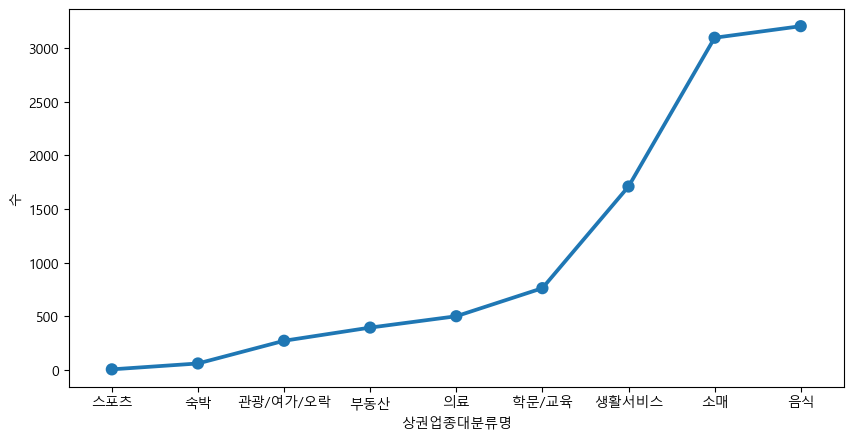

In [35]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax=fig.subplots()

d1=pd.read_csv("data/dat4.csv", sep=',', index_col=0).reset_index(drop=True)
d1.head()

## 코드작성
df5 = d1['상권업종대분류명'].value_counts().sort_values().reset_index()
df5.columns = ['상권업종대분류명','수']

_=sns.pointplot(data=df5,
                x='상권업종대분류명', y='수',
                ax=ax)

# 문제6
* 전체에서 두번째로 많은 비율을 차지하는 상권업종소분류와 그에 속하는 상점의 개수를 아래와 같이 출력하시오

In [38]:
d1=pd.read_csv("data/dat4.csv", sep=',', index_col=0).reset_index(drop=True)
d1.head()

## 코드작성
d1['상권업종소분류명'].value_counts().iloc[[1]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,네일스토리,생활서비스,이/미용/건강,발/네일케어,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32가길 16,126.898569,37.482941
1,위치캔들,소매,종합소매점,생활용품판매,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로3가길 21,126.930150,37.558207
2,카페쎄리오,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,휘경1동,휘경동,서울특별시 동대문구 망우로 71,127.061168,37.590012
3,현대세탁,생활서비스,세탁/가사서비스,세탁소/빨래방,서울특별시,구로구,개봉2동,개봉동,서울특별시 구로구 개봉로20길 158,126.860723,37.492034
4,미아현대비너스,소매,의복의류,셔츠/내의/속옷,서울특별시,성북구,길음2동,길음동,서울특별시 성북구 동소문로 315,127.028726,37.608392


커피전문점/카페/다방    458
Name: 상권업종소분류명, dtype: int64

# 문제7
* 각 시군구별로, 경도가 가장 큰 3개의 상점들의 경도 평균을 아래와 같이 series로 나타내시오

In [44]:
d1=pd.read_csv("data/dat4.csv", sep=',', index_col=0).reset_index(drop=True)
d1.head()

## 코드작성
def f7(sr1):
    sr2=sr1.sort_values(ascending=False)
    sr3=sr2.iloc[:3]
    return np.mean(sr3)

df7 = d1.groupby(['시군구명'])['경도'].apply(f7)
df7

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,네일스토리,생활서비스,이/미용/건강,발/네일케어,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32가길 16,126.898569,37.482941
1,위치캔들,소매,종합소매점,생활용품판매,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로3가길 21,126.930150,37.558207
2,카페쎄리오,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,휘경1동,휘경동,서울특별시 동대문구 망우로 71,127.061168,37.590012
3,현대세탁,생활서비스,세탁/가사서비스,세탁소/빨래방,서울특별시,구로구,개봉2동,개봉동,서울특별시 구로구 개봉로20길 158,126.860723,37.492034
4,미아현대비너스,소매,의복의류,셔츠/내의/속옷,서울특별시,성북구,길음2동,길음동,서울특별시 성북구 동소문로 315,127.028726,37.608392


시군구명
강남구     127.119159
강동구     127.175330
강북구     127.046089
강서구     126.876550
관악구     126.981745
광진구     127.111451
구로구     126.900996
금천구     126.919990
노원구     127.095184
도봉구     127.053636
동대문구    127.075086
동작구     126.981709
마포구     126.962797
서대문구    126.967182
서초구     127.082879
성동구     127.069831
성북구     127.065706
송파구     127.155106
양천구     126.883710
영등포구    126.938990
용산구     127.013171
은평구     126.937476
종로구     127.021950
중구      127.023883
중랑구     127.109327
Name: 경도, dtype: float64

# 문제8
* 강동구, 용산구, 강서구에 있는 상점 중, 상호명에 "공인중개"이라는 글자가 포함된 상점의 위치를 구별로 scatter plot 하시오 (seaborn 사용)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,네일스토리,생활서비스,이/미용/건강,발/네일케어,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32가길 16,126.898569,37.482941
1,위치캔들,소매,종합소매점,생활용품판매,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로3가길 21,126.930150,37.558207
2,카페쎄리오,음식,커피점/카페,커피전문점/카페/다방,서울특별시,동대문구,휘경1동,휘경동,서울특별시 동대문구 망우로 71,127.061168,37.590012
3,현대세탁,생활서비스,세탁/가사서비스,세탁소/빨래방,서울특별시,구로구,개봉2동,개봉동,서울특별시 구로구 개봉로20길 158,126.860723,37.492034
4,미아현대비너스,소매,의복의류,셔츠/내의/속옷,서울특별시,성북구,길음2동,길음동,서울특별시 성북구 동소문로 315,127.028726,37.608392


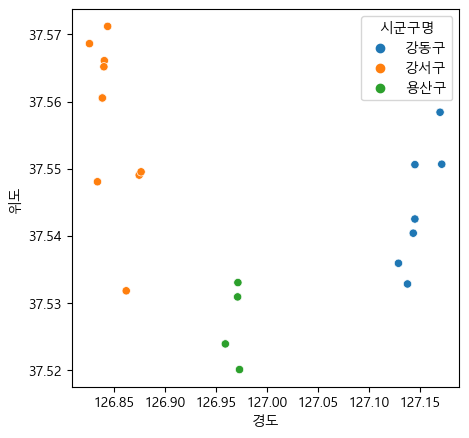

In [48]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()
d1=pd.read_csv("data/dat4.csv", sep=',', index_col=0).reset_index(drop=True)
d1.head()

## 코드작성
df8 = d1.loc[d1['시군구명'].isin(['강동구','용산구','강서구'])]
df8a = df8.loc[df8['상호명'].str.contains('공인중개')]

_=sns.scatterplot(data=df8a,
                   x='경도',y='위도',hue='시군구명',
                   ax=ax)

# 문제9
* C1별 C5별 count에 대한 bargraph를 그리고 그 위에 해당 값의 text를 넣는 코드이다.
* 코드작성 부분에 알맞은 코드를 넣어서 코드를 완성하시오
* 단, bar 하나의 width는 0.26 이다

C5,a,b,c
C1,,,
A,17,16,11
B,23,14,15
C,21,21,12
D,18,16,13
E,19,13,20
F,20,24,15


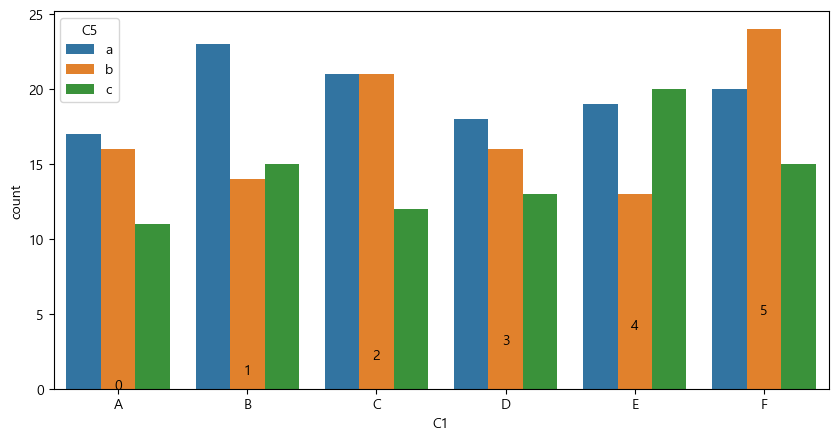

In [117]:
fig=plt.figure(figsize=(10,5), dpi=100)
d1=pd.read_csv("data/dat1.csv", sep=',', encoding='cp949').reset_index(drop=True)

cnt1=d1[['C1','C5']].value_counts().unstack()
cnt1

g = sns.countplot(data=d1, x="C1", hue="C5", order=cnt1.index)

for ii in range(len(cnt1)):
    # 
    _=g.text(x=ii, y=ii, s=ii, ha='center')
    

# 문제10
* 신청한 학생들의 평균 학년이 가장 낮은 과목을 출력하시오

In [56]:
d1=pd.read_table('data/dat2.csv', sep=',', encoding='cp949')
d1.head()

## 코드작성
d1.groupby(['과목'])['학년'].mean().sort_values().iloc[[0]].index[0]

,학년,과목,동아리,신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4


'mat'

# 문제11
* A,B,C 중 하나의 동아리에만 가입한 학생의 동아리별 학년 분포를 아래와 같이 나타내시오 (두 개 이상의 동아리에 가입한 경우는 제외)
* 단, pandas plot 사용하시오

,학년,과목,동아리,신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4
...,...,...,...,...
495,3,his,"A,C",11
496,1,mat,"A,B",5
497,3,his,"A,B,C",12
498,3,his,B,12


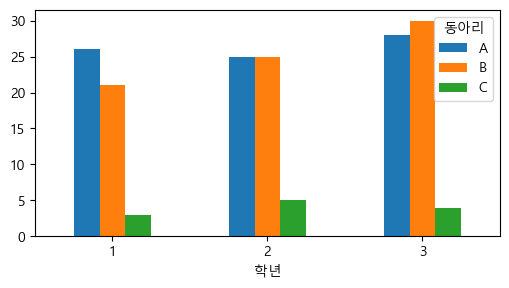

In [100]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax=fig.subplots()

d1=pd.read_table('data/dat2.csv', sep=',', encoding='cp949')
d1

## 코드작성
df11 = d1.loc[(d1['동아리']=='A')|(d1['동아리']=='B')|(d1['동아리']=='C')]
df111 = df11[['학년','동아리']].value_counts().unstack()
_=df111.plot.bar(ax=ax)


_=ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# 문제12
* 동아리 가입한 학생수를 아래와 같이 seaborn의 pointplot으로 나타내시오
* 1) A 동아리만 가입한 학생 수
* 2) B 동아리만 가입한 학생 수
* 3) C 동아리만 가입한 학생 수
* 4) 두개의 동아리에 가입한 학생 수
* 5) 세 개의 동아리에 가입한 학생 수
* 단) xtick 순서 ['A','B','C','2개','3개'] 
* 힌트) 가입한 동아리 구분은 ','로만 구분함
* 힌트) 새로운 컬럼 하나 추가 가능

,학년,과목,동아리,신청월
0,3,his,B,12
1,1,eng,B,7
2,2,his,B,5
3,2,eng,"B,C",9
4,1,mat,B,4
...,...,...,...,...
495,3,his,"A,C",11
496,1,mat,"A,B",5
497,3,his,"A,B,C",12
498,3,his,B,12


,동아리2,학년
0,A,79
1,B,76
2,C,12
3,2개,264
4,3개,69


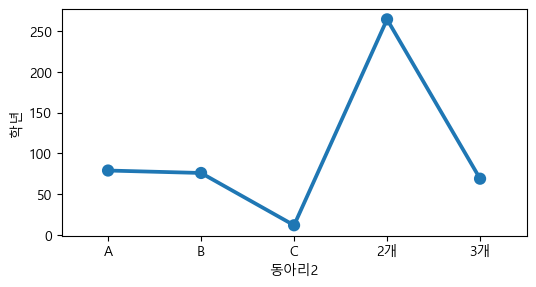

In [144]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax=fig.subplots()

d1=pd.read_table('data/dat2.csv', sep=',', encoding='cp949')
d1

## 코드작성
# d1['동아리'].value_counts().sort_index().reset_index()

sr1 = d1['동아리'].value_counts()
d2 = np.sum(sr1.iloc[:3])

d3 = np.sum(sr1.iloc[-2])

da = pd.Series(data=[d2,d3], index=['2개','3개'])

db = sr1.iloc[[3,4,6]]

d5 = pd.concat([db,da], axis=0).reset_index()

d5.columns = ['동아리2','학년']
d5

_=sns.pointplot(data=d5,
                x='동아리2', y='학년', 
                ax=ax)

# 문제13
* 주어진 d1에 있는 공원을 아래의 조건에 맞게 folium을 활용하여 지도에 표시하시오
* 1) 공원면적이 4000이상 이면 color='red', 4000미만 2000이상이면 color='green', 2000미만이면 color='blue'로 지정
* 2) folium.Marker 함수의 tooltip을 사용하고, tooltip시 공원명 나오게 코딩

In [92]:
import folium

d1=pd.read_table('data/dat6.csv', sep=',', encoding='cp949').drop(columns=['공원보유시설(유희시설)','공원보유시설(교양시설)','공원보유시설(기타시설)','관리기관명','제공기관코드','Unnamed: 19'])
d1 = d1.loc[(d1["경도"] < 132) & (d1["위도"] > 32)].copy()
d1=d1.iloc[::600].reset_index(drop=True)

lat = d1["위도"].mean()
long = d1["경도"].mean()

m = folium.Map([lat, long], zoom_start=8, tiles='Stamen Toner')

## 코드작성
  
dfa = d1.loc[d1['공원면적']>=4000]
for i in dfa.index:
    t1 = d1.loc[i,'공원명']
    lat = d1.loc[i,'위도']
    long = d1.loc[i,'경도']
    _=folium.Marker([lat,long], tooltip=t1, radius=3, icon=folium.Icon(color='red')).add_to(m)

dfb = d1.loc[(d1['공원면적']<4000)&(d1['공원면적']>=2000)]
for i in dfb.index:
    t1 = d1.loc[i,'공원명']
    lat = d1.loc[i,'위도']
    long = d1.loc[i,'경도']
    _=folium.Marker([lat,long], tooltip=t1, radius=3, icon=folium.Icon(color='green')).add_to(m)
   
dfc = d1.loc[d1['공원면적']<2000]
for i in dfc.index:
    t1 = d1.loc[i,'공원명']
    lat = d1.loc[i,'위도']
    long = d1.loc[i,'경도']
    _=folium.Marker([lat,long], tooltip=t1, radius=3, icon=folium.Icon(color='blue')).add_to(m)

m

# 문제14
* 각 시도에 있는 공원들에 대해서, 가장 많이 있는 공원구분과 해당 공원구분의 공원개수를 아래와 같이 나타내시오

In [68]:
d1 = pd.read_csv('data/dat6.csv', sep=',', encoding='cp949')
d1 = d1.loc[(d1["경도"] < 132) & (d1["위도"] > 32)].copy()
d1=d1.drop(columns='Unnamed: 19')
d1=d1.dropna(subset=['공원구분','소재지지번주소','지정고시일'])
d1['시도']=d1["소재지지번주소"].map(lambda x: x.split(' ')[0]).replace('강원','강원도')
d1.head(2)

## 코드작성
df14 = d1[['시도','공원구분']].value_counts().reset_index().drop_duplicates(subset='시도')
df14.columns = ['시도','공원구분','공원수']
df14

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시


,시도,공원구분,공원수
0,경기도,어린이공원,1468
1,경상남도,어린이공원,745
3,서울특별시,어린이공원,661
4,충청남도,어린이공원,626
5,전라남도,소공원,615
6,울산광역시,어린이공원,492
8,경상북도,어린이공원,444
9,충청북도,어린이공원,418
11,전라북도,어린이공원,368
12,부산광역시,어린이공원,362


# 문제15
* 공원구분이 '문화공원','수변공원','체육공원'인 공원의 공원구분 별로,
* 시도별 공원의 개수를 아래와 같이 3개의 axes에 나타내시오
* 단, seaborn의 catplot을 사용하시오 (axe 크기는 결과 그림과 똑같을 필요는 없고 적당히 구성하면 됨)

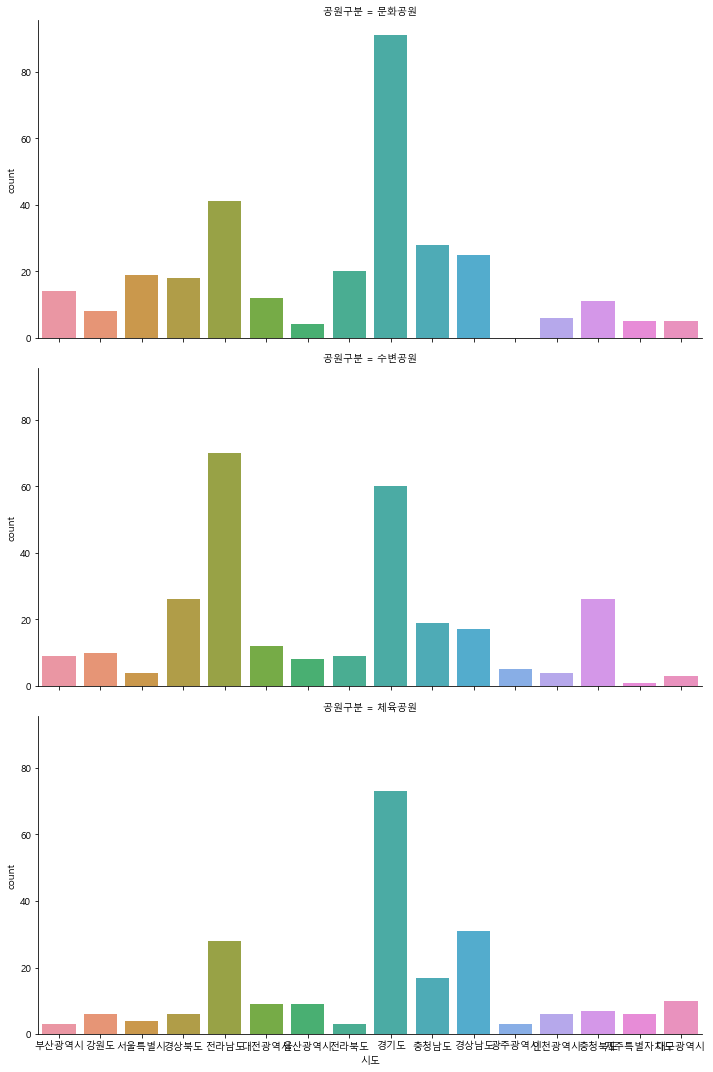

In [75]:
d1 = pd.read_csv('data/dat6.csv', sep=',', encoding='cp949')
d1 = d1.loc[(d1["경도"] < 132) & (d1["위도"] > 32)].copy()
d1=d1.drop(columns='Unnamed: 19')
d1=d1.dropna(subset=['공원구분','소재지지번주소'])
d1['시도']=d1["소재지지번주소"].map(lambda x: x.split(' ')[0]).replace('강원','강원도')
d2=d1.loc[d1['공원구분'].isin(['문화공원','수변공원','체육공원'])]
# d2.head(2)

## 코드작성
df15 = d2.loc[d2['공원구분'].isin(['문화공원','수변공원','체육공원'])]

fg=sns.catplot(data=df15,
               x ='시도', 
               kind = 'count',
               col='공원구분', col_wrap=1,
               height=5, aspect=2)
fg.fig.tight_layout()

# 문제16
* 공원구분중 공원의 개수가 500개 이상인 공원구분에 대해서 만 시도별로 시각화 하시오 (pandas plot 사용)

시도,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
공원구분,,,,,,,,,,,,,,,,
근린공원,141,806,388,178,96,98,99,141,323,91,163,322,262,78,422,262
소공원,85,406,178,100,18,52,47,95,175,152,37,625,111,1,308,151
어린이공원,391,1821,1161,575,305,289,315,363,1090,582,361,526,372,152,746,421


<AxesSubplot:xlabel='공원구분'>

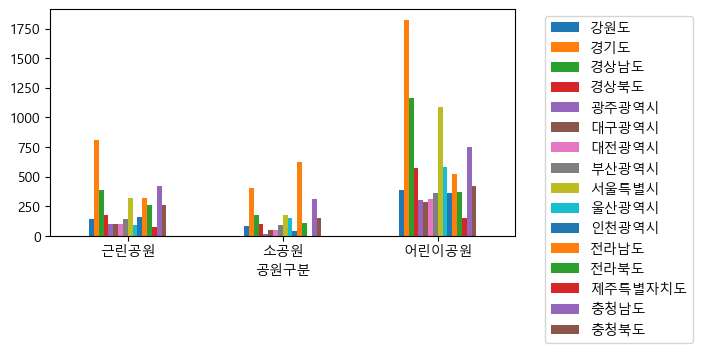

In [88]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax=fig.subplots()

d1 = pd.read_csv('data/dat6.csv', sep=',', encoding='cp949')
d1 = d1.loc[(d1["경도"] < 132) & (d1["위도"] > 32)].copy()
d1=d1.drop(columns='Unnamed: 19')
d1=d1.dropna(subset=['공원구분','소재지지번주소'])
d1['시도']=d1["소재지지번주소"].map(lambda x: x.split(' ')[0]).replace('강원','강원도')
# d1.head(2)

## 코드작성
sr16= d1['공원구분'].value_counts()
a = list(sr16[sr16>=500].index)

df16 = d1.loc[d1['공원구분'].isin(a)]
df16_= df16[['공원구분','시도']].value_counts().unstack()
df16_.plot.bar(ax=ax)

_=ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
_=ax.legend(bbox_to_anchor=(1.05,1),loc=2)